<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/TrkAna_RecoPulses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
!pip install uproot

     |████████████████████████████████| 122kB 2.9MB/s 
     |████████████████████████████████| 92kB 6.4MB/s 


In [ ]:
import sys
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/My Drive/'
except:
    main_path = ''
sys.path.append(main_path)
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [6]:
import uproot
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from itertools import cycle

In [8]:
root_file = uproot.open(main_path+"root_files_oksuzian/nts.owner.trkana-reco.pulses.root")
trkana  = root_file["TrkAnaNeg"]["trkana"]

In [9]:
def default_flatname(branchname, fieldname, index):
    """This replaces the dot in the column names with underscores"""
    out = branchname.replace(".", "_")
    if not isinstance(branchname, str):
        out = branchname.decode("utf-8")
    if fieldname is not None:
        fieldname.replace(".", "_")
        out += "_" + fieldname
    if index != ():
        out += "[" + "][".join(str(x) for x in index) + "]"
    return out

In [11]:
df_trkana = trkana.pandas.df(flatname=default_flatname, flatten=False)

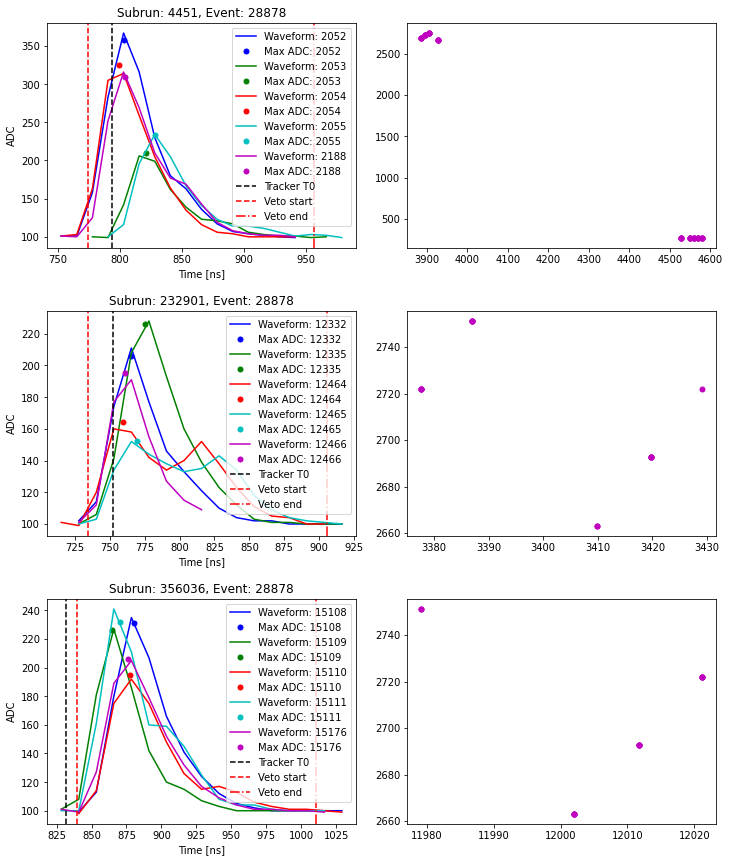

In [20]:
Nsipms = 5
Nevents = 3

fig, axes = plt.subplots(nrows=Nevents, ncols=2)
fig.tight_layout(pad=0)
fig.set_figheight(4*Nevents)
fig.set_figwidth(10)

for eve in range(Nevents):
  sipms_in_event = set(list(df_trkana['crvpulseinfo__SiPMId'][eve]))
  cycol = cycle('bgrcmk')
  for sipm_idx, sipm in enumerate(list(sipms_in_event)[:Nsipms]):
    c=next(cycol)
    selectSiPM = (df_trkana['crvwaveforminfo__SiPMId'][eve] == sipm)
    axes[eve][0].plot(df_trkana['crvwaveforminfo__time'][eve][selectSiPM], df_trkana['crvwaveforminfo__adc'][eve][selectSiPM], '-', c=c, label='Waveform: %i' % sipm)
    selectSiPM = (df_trkana['crvpulseinfo__SiPMId'][eve] == sipm)
    axes[eve][0].plot(df_trkana['crvpulseinfo__time'][eve][selectSiPM], df_trkana['crvpulseinfo__pulseHeight'][eve][selectSiPM], 'o', c=c, markersize=5, label='Max ADC: %i' % sipm)
  axes[eve][1].plot(df_trkana['crvpulseinfo__z'][eve], df_trkana['crvpulseinfo__y'][eve], 'o', c=c, markersize=5, label='Max ADC: %i' % sipm)
  axes[eve][0].axvline(x=df_trkana['de_t0'][eve], color='k', linestyle='--', label="Tracker T0")
  axes[eve][0].axvline(x=df_trkana['crvinfo__timeWindowStart'][eve][0]-25, color='r', linestyle='--', label="Veto start")
  axes[eve][0].axvline(x=df_trkana['crvinfo__timeWindowEnd'][eve][0]+125, color='r', linestyle='-.', label="Veto end")


  axes[eve][0].set_xlabel('Time [ns]')
  axes[eve][0].set_ylabel('ADC')
  axes[eve][0].set_title('Subrun: %i, Event: %i' % (df_trkana['evtinfo__eventid'][eve], df_trkana['evtinfo__subrunid'][eve]))
  axes[eve][0].legend()


In [14]:
!ls -Sltr '/content/drive/My Drive/root_files_oksuzian/'

total 2670515
-rw------- 1 root root 312371490 Nov  8  2019 nts.owner.stage1-dsstops-DS.g4-10-5.CRV.root
-rw------- 1 root root 303513305 Nov  8  2019 nts.owner.stage1-dsstops-DS.g4-10-5.DS.root
-rw------- 1 root root  78429054 Nov  8  2019 nts.owner.stage1-dsstops-CRV.g4-10-5.root
-rw------- 1 root root 144885833 Nov  8  2019 nts.owner.stage1-dsstops-DS.g4-10-5.root
-rw------- 1 root root 797073519 Nov  9  2019 step1stana.cry0919_minedep-filter.round9.low14.crv.root
-rw------- 1 root root 632740743 Nov  9  2019 step1stana.cry0919_minedep-filter.round9.low14.ds.root
-rw------- 1 root root 275271578 Nov 10  2019 cry2_new15July2019.root
-rw------- 1 root root  36177002 Nov 11  2019 trkana.round9.lo16.root
-rw------- 1 root root  53271680 Nov 11  2019 trkana.round10.all.root
-rw------- 1 root root  57483295 Nov 12  2019 trkana.round10.hi14.root
-rw------- 1 root root  43284977 Nov 13  2019 trkana.round10.lo14.root
-rw------- 1 root root    101112 Jul 18 22:21 nts.owner.trkana-reco.pulses.

In [15]:
list(df_trkana)

['evtinfo__eventid',
 'evtinfo__runid',
 'evtinfo__subrunid',
 'evtinfo__nprotons',
 'hcnt__nsh',
 'hcnt__nesel',
 'hcnt__nrsel',
 'hcnt__ntsel',
 'hcnt__nbkg',
 'hcnt__ntpk',
 'hcnt__ncd',
 'hcnt__ncrvd',
 'tcnt_nde',
 'tcnt_nue',
 'tcnt_ndm',
 'de_status',
 'de_alg',
 'de_pdg',
 'de_nhits',
 'de_ndof',
 'de_nactive',
 'de_ndouble',
 'de_ndactive',
 'de_nnullambig',
 'de_nmat',
 'de_nmatactive',
 'de_nbend',
 'de_t0',
 'de_t0err',
 'de_chisq',
 'de_fitcon',
 'de_radlen',
 'de_firstflt',
 'de_lastflt',
 'de_startvalid',
 'de_endvalid',
 'deent_mom',
 'deent_momerr',
 'deent_d0',
 'deent_p0',
 'deent_om',
 'deent_z0',
 'deent_td',
 'deent_d0err',
 'deent_p0err',
 'deent_omerr',
 'deent_z0err',
 'deent_tderr',
 'demid_mom',
 'demid_momerr',
 'demid_d0',
 'demid_p0',
 'demid_om',
 'demid_z0',
 'demid_td',
 'demid_d0err',
 'demid_p0err',
 'demid_omerr',
 'demid_z0err',
 'demid_tderr',
 'dexit_mom',
 'dexit_momerr',
 'dexit_d0',
 'dexit_p0',
 'dexit_om',
 'dexit_z0',
 'dexit_td',
 'dexit_d0

In [12]:
def make_cuts(dfname):
  dfname_cut  = dfname.loc[
      (dfname['ue_status'] < 0) 
    & (dfname['deent_td'] > 0.57735027) 
    & (dfname['deent_td'] < 1.0)
    & (dfname['deent_d0'] > -80)
    & (dfname['deent_d0'] < 105)
    & ((dfname['deent_d0'] + 2./dfname['deent_om']) > 450)
    & ((dfname['deent_d0'] + 2./dfname['deent_om']) < 680)
    & (dfname['dequal_TrkQual'] > 0.8) 
    & (dfname['dequal_TrkPID'] > 0.9)
    & (dfname['dequal_TrkPID'] > 0.5)
#    &  (dfname['bestcrv'] < 0)
    ] 
  return dfname_cut